In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import KernelPCA
#from sklearn.manifold import TSNEfrom IPython.display 
import itertools

In [14]:
base = pd.read_csv('/content/ingredientes.csv')
print(base.shape)
base.head(10)

(425, 17)


,idDrink,strDrink,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9,strIngredient10,strIngredient11,strIngredient12,strIngredient13,strIngredient14,strIngredient15
0,11002,Long Island Tea,Vodka,Light rum,Gin,Tequila,Lemon,Coca-Cola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11000,Mojito,Light rum,Lime,Sugar,Mint,Soda water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11001,Old Fashioned,Bourbon,Angostura bitters,Sugar,Water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11003,Negroni,Gin,Campari,Sweet Vermouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11004,Whiskey Sour,Blended whiskey,Lemon,Powdered sugar,Cherry,Lemon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11007,Margarita,Tequila,Triple sec,Lime juice,Salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11006,Daiquiri,Light rum,Lime,Powdered sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11005,Dry Martini,Gin,Dry Vermouth,Olive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11008,Manhattan,Sweet Vermouth,Bourbon,Angostura bitters,Ice,Maraschino cherry,Orange peel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11020,Algonquin,Blended whiskey,Dry Vermouth,Pineapple juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idDrink          425 non-null    int64  
 1   strDrink         425 non-null    object 
 2   strIngredient1   425 non-null    object 
 3   strIngredient2   425 non-null    object 
 4   strIngredient3   361 non-null    object 
 5   strIngredient4   230 non-null    object 
 6   strIngredient5   141 non-null    object 
 7   strIngredient6   62 non-null     object 
 8   strIngredient7   16 non-null     object 
 9   strIngredient8   4 non-null      object 
 10  strIngredient9   2 non-null      object 
 11  strIngredient10  1 non-null      object 
 12  strIngredient11  1 non-null      object 
 13  strIngredient12  0 non-null      float64
 14  strIngredient13  0 non-null      float64
 15  strIngredient14  0 non-null      float64
 16  strIngredient15  0 non-null      float64
dtypes: float64(4), i

In [16]:
base=base.drop(['strIngredient12','strIngredient13','strIngredient14','strIngredient15'],axis=1)

In [17]:
base=base.replace(np.nan,"")

In [18]:
base['ingredients']=base[['strIngredient1','strIngredient2','strIngredient3','strIngredient4','strIngredient5',
        'strIngredient6','strIngredient7','strIngredient8','strIngredient9','strIngredient10','strIngredient11']].agg(','.join, axis=1)
base.ingredients

0       Vodka,Light rum,Gin,Tequila,Lemon,Coca-Cola,,,,,
1             Light rum,Lime,Sugar,Mint,Soda water,,,,,,
2           Bourbon,Angostura bitters,Sugar,Water,,,,,,,
3                     Gin,Campari,Sweet Vermouth,,,,,,,,
4      Blended whiskey,Lemon,Powdered sugar,Cherry,Le...
                             ...                        
420                     Vodka,Kahlua,Sugar syrup,,,,,,,,
421           Baileys irish cream,Kahlua,Sambuca,,,,,,,,
422                                  Vodka,Ouzo,,,,,,,,,
423     Southern Comfort,Triple sec,Lime,Sour mix,,,,,,,
424    Orange Bitters,Green Chartreuse,Gin,Sweet Verm...
Name: ingredients, Length: 425, dtype: object

In [19]:
#función para convertir el texto en minúsculas
def lower(text):
    text=text.lower()
    return text

ingredients_low=[]
for i in base.ingredients:
    il=lower(i)
    ingredients_low.append(il)

base['ingredients']=ingredients_low
base.ingredients

0       vodka,light rum,gin,tequila,lemon,coca-cola,,,,,
1             light rum,lime,sugar,mint,soda water,,,,,,
2           bourbon,angostura bitters,sugar,water,,,,,,,
3                     gin,campari,sweet vermouth,,,,,,,,
4      blended whiskey,lemon,powdered sugar,cherry,le...
                             ...                        
420                     vodka,kahlua,sugar syrup,,,,,,,,
421           baileys irish cream,kahlua,sambuca,,,,,,,,
422                                  vodka,ouzo,,,,,,,,,
423     southern comfort,triple sec,lime,sour mix,,,,,,,
424    orange bitters,green chartreuse,gin,sweet verm...
Name: ingredients, Length: 425, dtype: object

In [20]:
#function to convert list of ingredients into a dictionary
def convert_to_dict(lst):
    d = {} #empty dict
    for ingre in lst:
        d[ingre] = 1
    return d

In [21]:
base['bagofwords'] = base.ingredients.str.split(',').apply(convert_to_dict)
print(base.bagofwords)

0      {'vodka': 1, 'light rum': 1, 'gin': 1, 'tequil...
1      {'light rum': 1, 'lime': 1, 'sugar': 1, 'mint'...
2      {'bourbon': 1, 'angostura bitters': 1, 'sugar'...
3      {'gin': 1, 'campari': 1, 'sweet vermouth': 1, ...
4      {'blended whiskey': 1, 'lemon': 1, 'powdered s...
                             ...                        
420    {'vodka': 1, 'kahlua': 1, 'sugar syrup': 1, ''...
421    {'baileys irish cream': 1, 'kahlua': 1, 'sambu...
422                       {'vodka': 1, 'ouzo': 1, '': 1}
423    {'southern comfort': 1, 'triple sec': 1, 'lime...
424    {'orange bitters': 1, 'green chartreuse': 1, '...
Name: bagofwords, Length: 425, dtype: object


In [77]:
#one hot encoding
vector_dict = DictVectorizer(sparse = False)
X = vector_dict.fit_transform(base["bagofwords"].tolist())
y = base.strDrink

In [78]:
kpca = KernelPCA(n_components=2,kernel="cosine", n_jobs=2)
x_pca = kpca.fit_transform(X)
x_pca.shape

(425, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


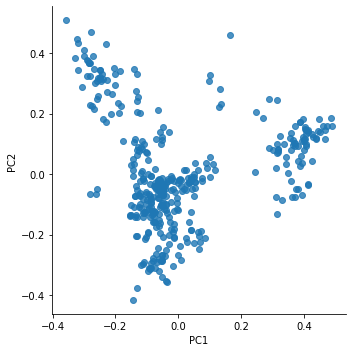

In [79]:
# Plotting the clusters
plot_pca = pd.DataFrame(data = x_pca[:,:2], columns = ["PC1","PC2"])
sns.lmplot("PC1", "PC2", data = plot_pca, palette = "Paired",legend=True, fit_reg = False)

In [80]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=42).fit(x_pca)
kmeans.labels_

array([3, 2, 2, 3, 2, 0, 2, 3, 0, 0, 0, 3, 1, 0, 0, 3, 0, 0, 1, 1, 3, 2,
       3, 3, 3, 0, 2, 0, 0, 2, 0, 3, 3, 3, 2, 0, 0, 3, 3, 2, 2, 2, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 2, 3, 0, 2, 0, 0, 3, 3, 1, 1, 0,
       2, 0, 0, 0, 0, 2, 3, 1, 0, 0, 1, 0, 2, 0, 0, 1, 3, 0, 0, 2, 1, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 2, 0, 3, 3, 0, 3, 0,
       0, 0, 0, 2, 2, 2, 3, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 3, 0,
       0, 0, 3, 0, 0, 1, 0, 2, 0, 0, 0, 2, 3, 3, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 3,
       0, 0, 3, 0, 0, 2, 0, 0, 0, 2, 3, 2, 0, 0, 0, 2, 2, 3, 1, 0, 0, 0,
       0, 3, 0, 1, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 1,
       3, 2, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 3, 0,
       1, 0, 2, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0,
       0, 1, 0, 2, 2, 3, 0, 2, 2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1, 2, 0,

In [81]:
label = kmeans.fit_predict(x_pca)

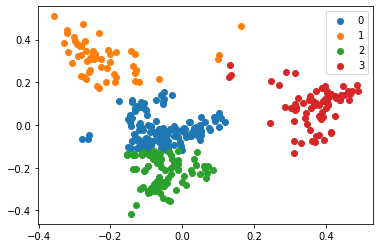

In [82]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x_pca[label == i , 0] , x_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [88]:
from scipy import spatial
List1 = X[0]
List2 = X[1]
result = 1 - spatial.distance.cosine(List1, List2)
print(result)  

0.30860669992418377


In [153]:
def get_cosine_distance(objective,n_return = 5):
  values = []
  for i in range(len(X)):
    values.append(1 - spatial.distance.cosine(objective, X[i]))
  ind = np.argpartition(values, -1 * n_return)[-1 * n_return:]
  top_n = y[ind]
  return top_n

In [155]:
get_cosine_distance(X[200])

352    Flaming Dr. Pepper
245             Afternoon
179          Grizzly Bear
208           Grim Reaper
200           Texas Sling
Name: strDrink, dtype: object

# References

https://plotly.com/python/pca-visualization/

https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python

https://medium.com/web-mining-is688-spring-2021/how-dishes-are-clustered-together-based-on-the-ingredients-3b357ac02b26

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.askpython.com/python/examples/plot-k-means-clusters-python

https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html